In [1]:
import re
#numpy numerical calculation, matplotlib for visualization
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")
#plt.style.use('ggplot')

In [2]:
train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test.csv")

In [20]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,22.000000,1,0,7.2500,0,2,0
1,1,1,0,38.000000,1,0,71.2833,1,2,1
2,1,3,0,26.000000,0,0,7.9250,0,1,2
3,1,1,0,35.000000,1,0,53.1000,0,2,1
4,0,3,1,35.000000,0,0,8.0500,0,1,0
5,0,3,1,29.699118,0,0,8.4583,2,1,0
6,0,1,1,54.000000,0,0,51.8625,0,1,0
7,0,3,1,2.000000,3,1,21.0750,0,5,3
8,1,3,0,27.000000,0,2,11.1333,0,3,1
9,1,2,0,14.000000,1,0,30.0708,1,2,1


# Missing data exploration


In [3]:
#non numeric data

missing_val_df = pd.DataFrame(index=["Total", "Unique Cabin", "Missing Cabin"])
for name, df in zip(("Training data", "Test data"), (train, test)):
    total = df.shape[0]
    unique_cabin = len(df["Cabin"].unique())
    missing_cabin = df["Cabin"].isnull().sum()
    missing_val_df[name] = [total, unique_cabin, missing_cabin]
missing_val_df

,Training data,Test data
Total,891,418
Unique Cabin,148,77
Missing Cabin,687,327


In [4]:
train.drop("PassengerId", axis=1, inplace=True)
for df in train, test:
    df.drop("Cabin", axis=1, inplace=True)

Text(0.5,1,'Bar plot of embarked in Southampton, Queenstown, Cherbourg')

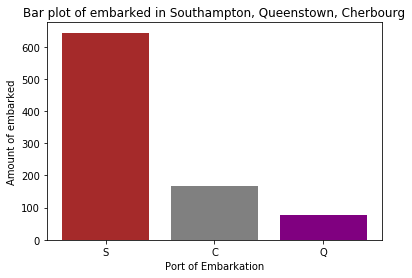

In [5]:
non_empty_embarked = train["Embarked"].dropna()
unique_values, value_counts = non_empty_embarked.unique(), non_empty_embarked.value_counts()
X = np.arange(len(unique_values))
colors = ["brown", "grey", "purple"]

plt.bar(left=X,
        height=value_counts,
        color=colors,
        tick_label=unique_values)
plt.xlabel("Port of Embarkation")
plt.ylabel("Amount of embarked")
plt.title("Bar plot of embarked in Southampton, Queenstown, Cherbourg")

[Text(0,0.5,'Amount'), Text(0.5,0,'Age'), Text(0.5,1,'Dead')]

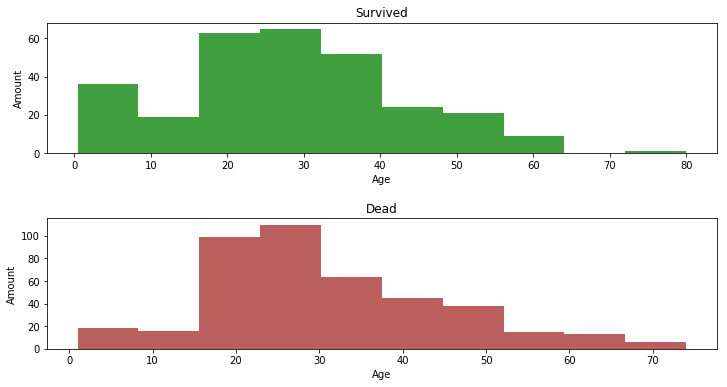

In [6]:
#Quantitative data

survived = train[train["Survived"] == 1]["Age"].dropna()
perished = train[train["Survived"] == 0]["Age"].dropna()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 6)
fig.subplots_adjust(hspace=0.5)
ax1.hist(survived, facecolor='green', alpha=0.75)
ax1.set(title="Survived", xlabel="Age", ylabel="Amount")
ax2.hist(perished, facecolor='brown', alpha=0.75)
ax2.set(title="Dead", xlabel="Age", ylabel="Amount")

[Text(0,0.5,'Amount'), Text(0.5,0,'Age'), Text(0.5,1,'Dead')]

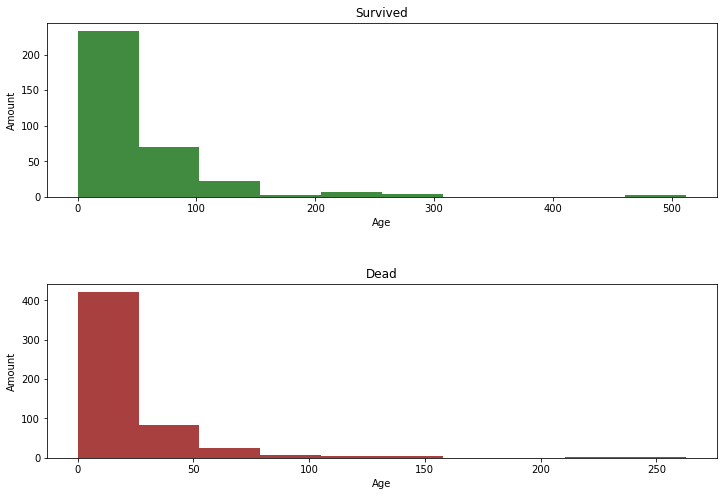

In [7]:
survived = train[train["Survived"] == 1]["Fare"].dropna()
perished = train[train["Survived"] == 0]["Fare"].dropna()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 8)
fig.subplots_adjust(hspace=0.5)
ax1.hist(survived, facecolor='darkgreen', alpha=0.75)
ax1.set(title="Survived", xlabel="Age", ylabel="Amount")
ax2.hist(perished, facecolor='darkred', alpha=0.75)
ax2.set(title="Dead", xlabel="Age", ylabel="Amount")

In [8]:
for df in train, test:
    df["Embarked"].fillna("S", inplace=True)
    for feature in "Age", "Fare":
        df[feature].fillna(train[feature].mean(), inplace=True)
for df in train, test:
    df.drop("Ticket", axis=1, inplace=True)

# Feature engineering

In [9]:
for df in train, test:
    df["Embarked"] = df["Embarked"].map(dict(zip(("S", "C", "Q"), (0, 1, 2))))
    df["Sex"] = df["Sex"].map(dict(zip(("female", "male"), (0, 1))))

In [10]:
for df in train, test:
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [11]:
for df in train, test:
    titles = list()
    for row in df["Name"]:
        surname, title, name = re.split(r"[,.]", row, maxsplit=2)
        titles.append(title.strip())
    df["Title"] = titles
    df.drop("Name", axis=1, inplace=True)



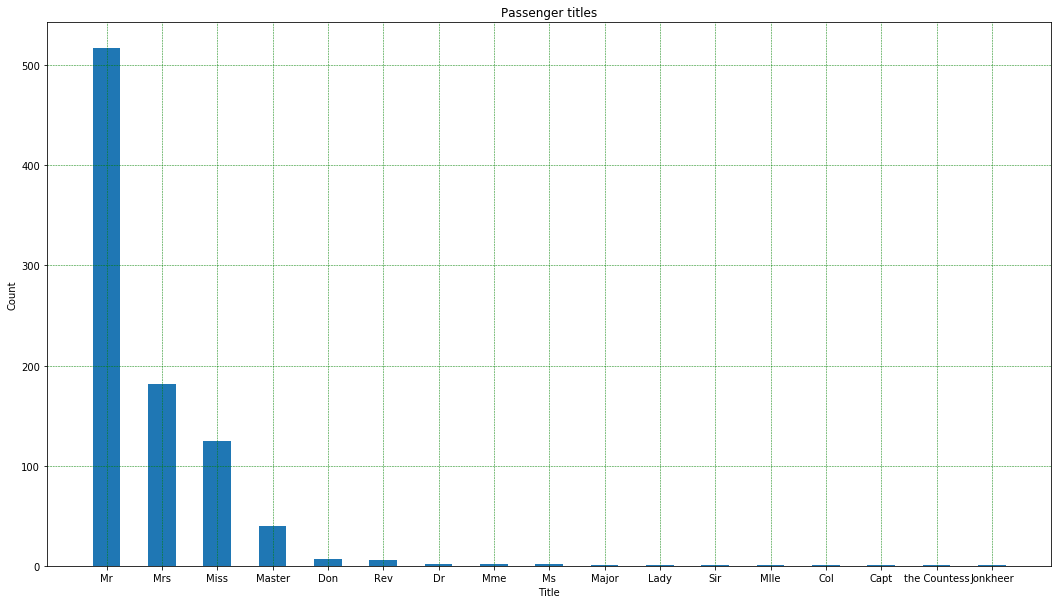

In [12]:
title = train["Title"]
unique_values, value_counts = title.unique(), title.value_counts()
X = np.arange(len(unique_values))

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.bar(left=X, height=value_counts, width=0.5, tick_label=unique_values)
ax.set_xlabel("Title")
ax.set_ylabel("Count")
ax.set_title("Passenger titles")
ax.grid(color='g', linestyle='--', linewidth=0.5)

In [13]:
#very rare surnames need to be replaced
for df in train, test:
    for key, value in zip(("Mr", "Mrs", "Miss", "Master", "Dr", "Rev"),
                          np.arange(6)):
        df.loc[df["Title"] == key, "Title"] = value
    df.loc[df["Title"] == "Ms", "Title"] = 1
    for title in "Major", "Col", "Capt":
        df.loc[df["Title"] == title, "Title"] = 6
    for title in "Mlle", "Mme":
        df.loc[df["Title"] == title, "Title"] = 7
    for title in "Don", "Sir":
        df.loc[df["Title"] == title, "Title"] = 8
    for title in "Lady", "the Countess", "Jonkheer":
        df.loc[df["Title"] == title, "Title"] = 9
test["Title"][414] = 0

In [14]:
nominal_features = ["Pclass", "Sex", "Embarked", "FamilySize", "Title"]
for df in train, test:
    for nominal in nominal_features:
        df[nominal] = df[nominal].astype(dtype="category")

In [15]:
train.sample(frac=1).head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
806,0,1,1,39.000000,0,0,0.00,0,1,0
872,0,1,1,33.000000,0,0,5.00,0,1,0
720,1,2,0,6.000000,0,1,33.00,0,2,2
815,0,1,1,29.699118,0,0,0.00,0,1,0
845,0,3,1,42.000000,0,0,7.55,0,1,0


# Prediction

In [16]:
from sklearn.model_selection import train_test_split
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch",
              "Fare", "Embarked", "FamilySize", "Title"]
X_train, X_test, y_train, y_test = train_test_split(train[predictors], train["Survived"])

In [17]:
#Build a Random Forest model from the training set and evaluate the mean accuracy on the given test

forest = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=5,
                                min_samples_split=10,
                                min_samples_leaf=5,
                                random_state=0)
forest.fit(X_train, y_train)
print("Random Forest score: {0:.2}".format(forest.score(X_test, y_test)))

Random Forest score: 0.83


([<matplotlib.axis.XTick at 0xbd0a198>,
 <a list of 9 Text xticklabel objects>)

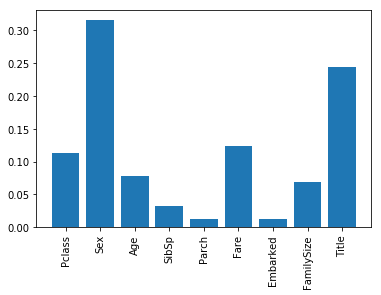

In [18]:
plt.bar(np.arange(len(predictors)), forest.feature_importances_)
plt.xticks(np.arange(len(predictors)), predictors, rotation='vertical')

In [19]:
predictors = ["Title", "Sex", "Fare", "Pclass", "Age", "FamilySize"]
clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             random_state=0)
clf.fit(train[predictors], train["Survived"])
prediction = clf.predict(test[predictors])

submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})
submission.to_csv("submission.csv", index=False)